In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

In [2]:
df = pd.read_excel("../Data/Preprocessed/train_data.xlsx")

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11309 entries, 0 to 11308
Columns: 151 entries, ofd_date to week_no
dtypes: datetime64[ns](1), int64(150)
memory usage: 13.0 MB


In [4]:
df.describe()

,OFD,Slam,Earlies_Exp,Earlies_Rec,MNR_SNR_Exp,Rollover,Returns,R_Sideline,Sideline,Country_A,...,Delivery_D75,Delivery_D76,Delivery_D77,Delivery_D78,Delivery_D79,Delivery_D8,Delivery_D80,Delivery_D9,weekday,week_no
count,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,...,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000,11309.000000
mean,16107.803254,16050.335662,644.620656,653.369882,215.780175,231.747811,162.216642,181.492970,175.501547,0.258997,...,0.012822,0.012822,0.012822,0.012822,0.012822,0.013264,0.012822,0.013264,2.836944,15.199664
std,7390.784150,7242.689184,604.513009,609.118523,475.355339,602.885062,303.522951,497.362834,485.388451,0.438103,...,0.112509,0.112509,0.112509,0.112509,0.112509,0.114407,0.112509,0.114407,1.943064,6.240884
min,0.000000,6.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000
25%,11298.000000,11337.000000,220.000000,225.000000,76.000000,51.000000,40.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,10.000000
50%,14644.000000,14617.000000,463.000000,475.000000,120.000000,87.000000,81.000000,2.000000,2.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,15.000000
75%,19113.000000,19120.000000,867.000000,876.000000,208.000000,183.000000,148.000000,115.000000,119.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,21.000000
max,50365.000000,50421.000000,4934.000000,5219.000000,17411.000000,18839.000000,5479.000000,8090.000000,8121.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,26.000000


In [5]:
df["OFD_Expected"] = df["Slam"] + df["Earlies_Exp"] - df["Earlies_Rec"] - df["MNR_SNR_Exp"] + df["Rollover"] + df["Returns"] + df["R_Sideline"] - df["Sideline"]

In [6]:
df["other"] = df["OFD"] - df["OFD_Expected"]

In [7]:
df

,ofd_date,OFD,Slam,Earlies_Exp,Earlies_Rec,MNR_SNR_Exp,Rollover,Returns,R_Sideline,Sideline,...,Delivery_D77,Delivery_D78,Delivery_D79,Delivery_D8,Delivery_D80,Delivery_D9,weekday,week_no,OFD_Expected,other
0,2021-02-01,18645,18982,314,1177,65,145,126,356,2,...,0,0,0,0,0,0,0,5,18679,-34
1,2021-02-01,16828,16504,248,333,83,135,112,256,1,...,0,0,0,0,0,0,0,5,16838,-10
2,2021-02-01,12479,12345,163,196,64,64,62,136,0,...,0,0,0,0,0,0,0,5,12510,-31
3,2021-02-01,18986,18861,318,446,83,100,107,248,1,...,0,0,0,0,0,0,0,5,19104,-118
4,2021-02-01,16025,15768,487,383,62,69,195,15,1,...,0,0,0,0,0,0,0,5,16088,-63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,2021-06-30,10006,10423,399,842,52,60,65,1,1,...,0,0,0,0,0,0,2,26,10053,-47
11305,2021-06-30,11165,11467,514,769,56,39,29,0,1,...,0,0,0,0,0,0,2,26,11223,-58
11306,2021-06-30,14562,15651,1028,1910,225,35,47,3,1,...,0,0,0,0,0,0,2,26,14628,-66
11307,2021-06-30,12736,13111,655,823,211,29,17,2,1,...,0,0,0,0,0,0,2,26,12779,-43


In [8]:
cols = list(df.columns[:-2])

In [9]:
cols.insert(2,"OFD_Expected")
cols.insert(3,"other")

In [10]:
df = df[cols]

In [11]:
df

,ofd_date,OFD,OFD_Expected,other,Slam,Earlies_Exp,Earlies_Rec,MNR_SNR_Exp,Rollover,Returns,...,Delivery_D75,Delivery_D76,Delivery_D77,Delivery_D78,Delivery_D79,Delivery_D8,Delivery_D80,Delivery_D9,weekday,week_no
0,2021-02-01,18645,18679,-34,18982,314,1177,65,145,126,...,0,0,0,0,0,0,0,0,0,5
1,2021-02-01,16828,16838,-10,16504,248,333,83,135,112,...,0,0,0,0,0,0,0,0,0,5
2,2021-02-01,12479,12510,-31,12345,163,196,64,64,62,...,0,0,0,0,0,0,0,0,0,5
3,2021-02-01,18986,19104,-118,18861,318,446,83,100,107,...,0,0,0,0,0,0,0,0,0,5
4,2021-02-01,16025,16088,-63,15768,487,383,62,69,195,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,2021-06-30,10006,10053,-47,10423,399,842,52,60,65,...,0,0,0,0,0,0,0,0,2,26
11305,2021-06-30,11165,11223,-58,11467,514,769,56,39,29,...,0,0,0,0,0,0,0,0,2,26
11306,2021-06-30,14562,14628,-66,15651,1028,1910,225,35,47,...,0,0,0,0,0,0,0,0,2,26
11307,2021-06-30,12736,12779,-43,13111,655,823,211,29,17,...,0,0,0,0,0,0,0,0,2,26


<AxesSubplot:xlabel='ofd_date'>

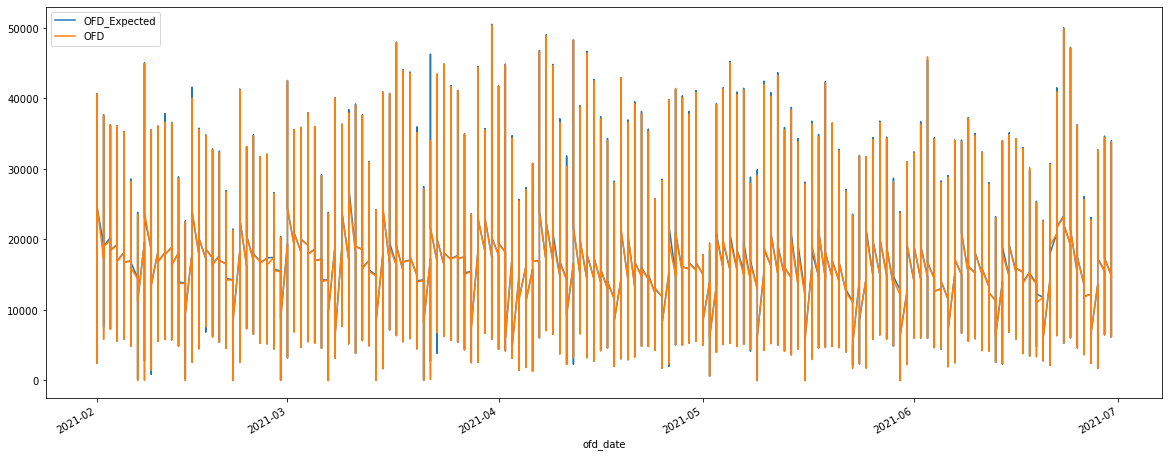

In [12]:
df.plot(x="ofd_date", y=["OFD_Expected","OFD"], figsize=(20,8))

<Figure size 1440x576 with 0 Axes>

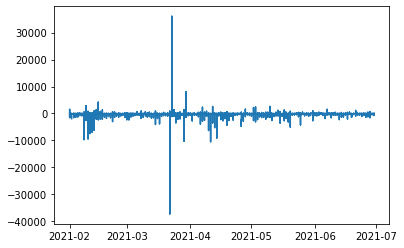

<Figure size 1440x576 with 0 Axes>

In [15]:
plt.plot(df["ofd_date"], df["OFD"] - df["OFD_Expected"])
plt.figure(figsize=(20,8))

In [16]:
def outlier_point_highlight(col, outlier_indices):
    outliers = np.empty(len(col))
    outliers[:] = np.nan
    for i,outlier_index in enumerate(outlier_indices):
        if outlier_index == -1:
            outliers[i] = col[i]
    return outliers

In [17]:
for col in df.columns[2:12]:
    outlier_indices = IsolationForest(contamination=0.03, random_state=42).fit_predict(df[col].values.reshape(-1,1))
    outliers = outlier_point_highlight(df[col].values, outlier_indices)
    df[col] = df[col].where(~df[col].isin(outliers), np.nan)

In [18]:
df.interpolate(method='ffill', inplace=True)
df.interpolate(method='bfill', inplace=True)
df = df.dropna().reset_index().drop(labels="index", axis=1)
df["OFD_Expected"] = df["Slam"] + df["Earlies_Exp"] - df["Earlies_Rec"] - df["MNR_SNR_Exp"] + df["Rollover"] + df["Returns"] + df["R_Sideline"] - df["Sideline"]
df["other"] = df["OFD"] - df["OFD_Expected"]

In [19]:
df

,ofd_date,OFD,OFD_Expected,other,Slam,Earlies_Exp,Earlies_Rec,MNR_SNR_Exp,Rollover,Returns,...,Delivery_D75,Delivery_D76,Delivery_D77,Delivery_D78,Delivery_D79,Delivery_D8,Delivery_D80,Delivery_D9,weekday,week_no
0,2021-02-01,18645,18679.0,-34.0,18982.0,314.0,1177.0,65.0,145.0,126.0,...,0,0,0,0,0,0,0,0,0,5
1,2021-02-01,16828,16838.0,-10.0,16504.0,248.0,333.0,83.0,135.0,112.0,...,0,0,0,0,0,0,0,0,0,5
2,2021-02-01,12479,12510.0,-31.0,12345.0,163.0,196.0,64.0,64.0,62.0,...,0,0,0,0,0,0,0,0,0,5
3,2021-02-01,18986,19104.0,-118.0,18861.0,318.0,446.0,83.0,100.0,107.0,...,0,0,0,0,0,0,0,0,0,5
4,2021-02-01,16025,16088.0,-63.0,15768.0,487.0,383.0,62.0,69.0,195.0,...,0,0,0,0,0,0,0,0,0,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11304,2021-06-30,10006,10053.0,-47.0,10423.0,399.0,842.0,52.0,60.0,65.0,...,0,0,0,0,0,0,0,0,2,26
11305,2021-06-30,11165,11223.0,-58.0,11467.0,514.0,769.0,56.0,39.0,29.0,...,0,0,0,0,0,0,0,0,2,26
11306,2021-06-30,14562,14628.0,-66.0,15651.0,1028.0,1910.0,225.0,35.0,47.0,...,0,0,0,0,0,0,0,0,2,26
11307,2021-06-30,12736,12779.0,-43.0,13111.0,655.0,823.0,211.0,29.0,17.0,...,0,0,0,0,0,0,0,0,2,26


In [20]:
df.to_excel("../Data/Final/train_data_revised_2.xlsx", index=False)

<AxesSubplot:xlabel='ofd_date'>

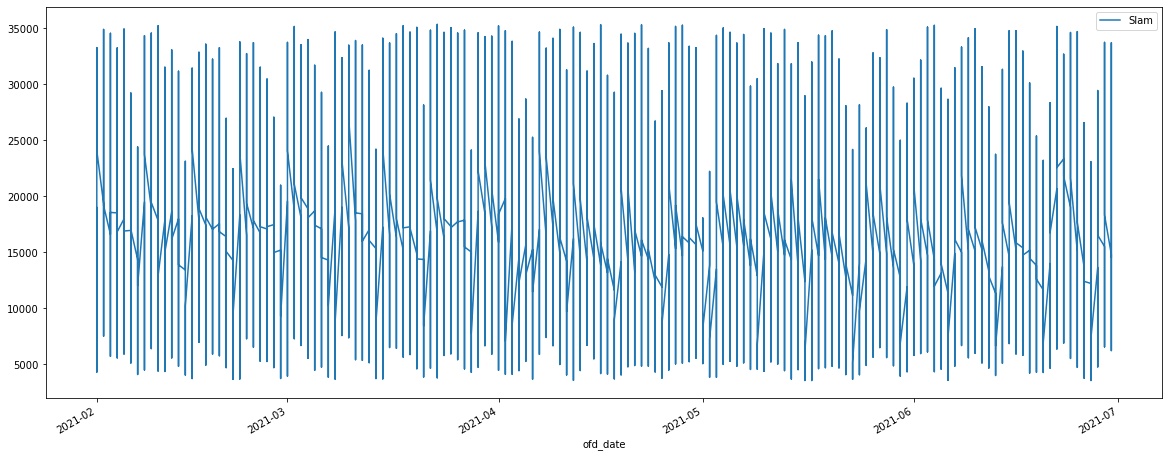

In [21]:
df.plot(x="ofd_date", y=["Slam"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

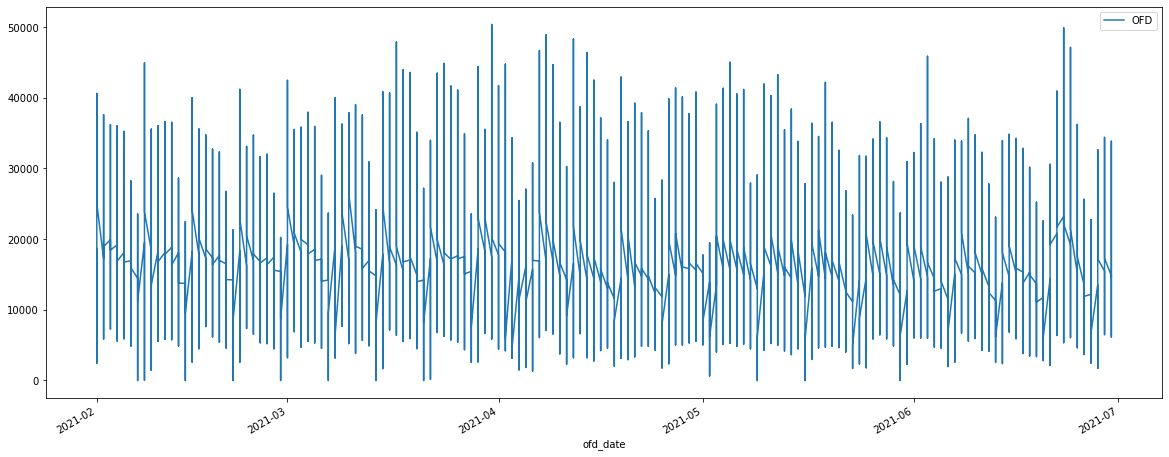

In [22]:
df.plot(x="ofd_date", y=["OFD"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

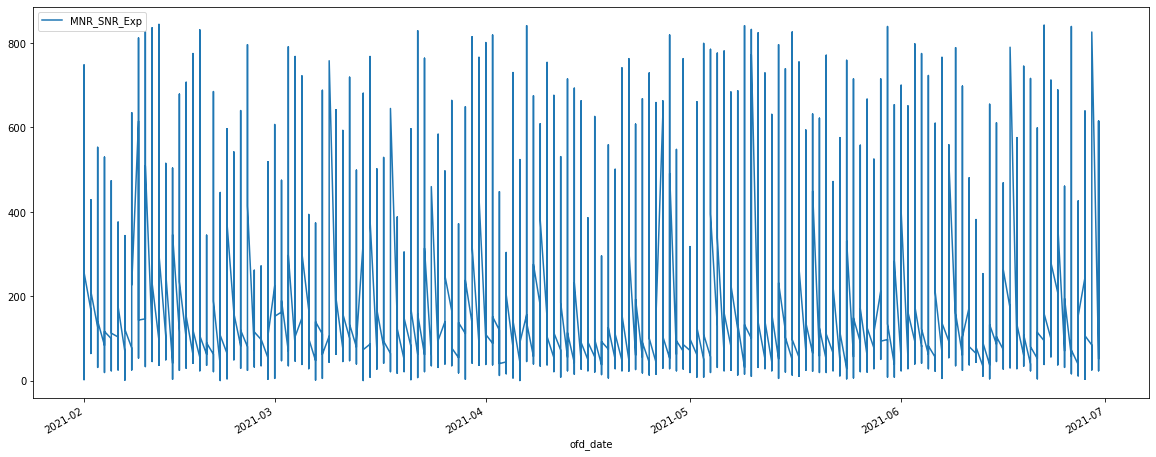

In [23]:
df.plot(x="ofd_date", y=["MNR_SNR_Exp"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

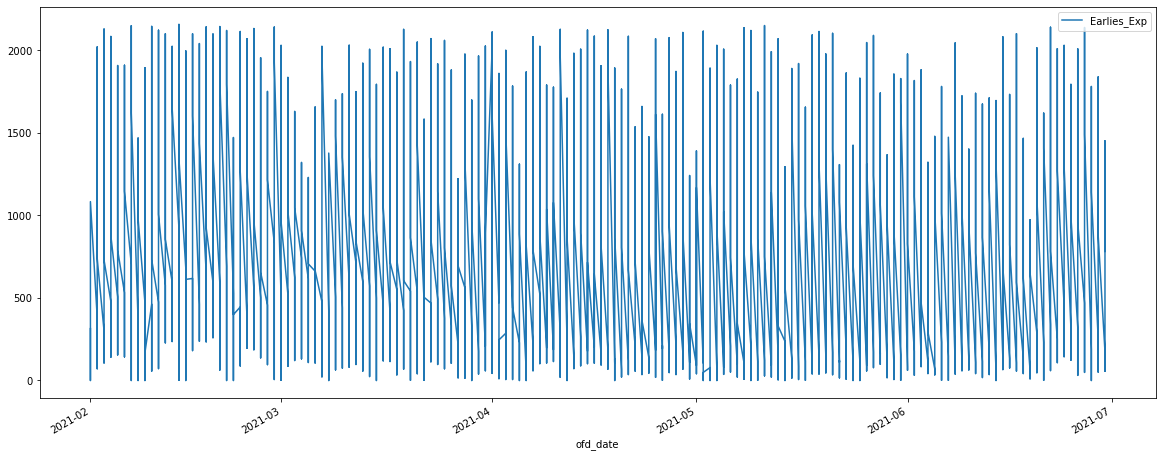

In [24]:
df.plot(x="ofd_date", y=["Earlies_Exp"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

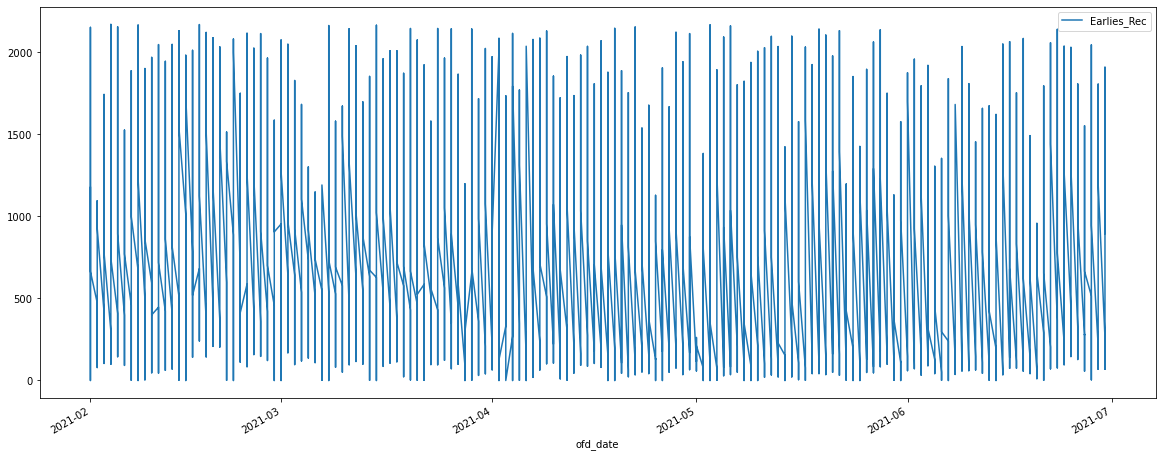

In [25]:
df.plot(x="ofd_date", y=["Earlies_Rec"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

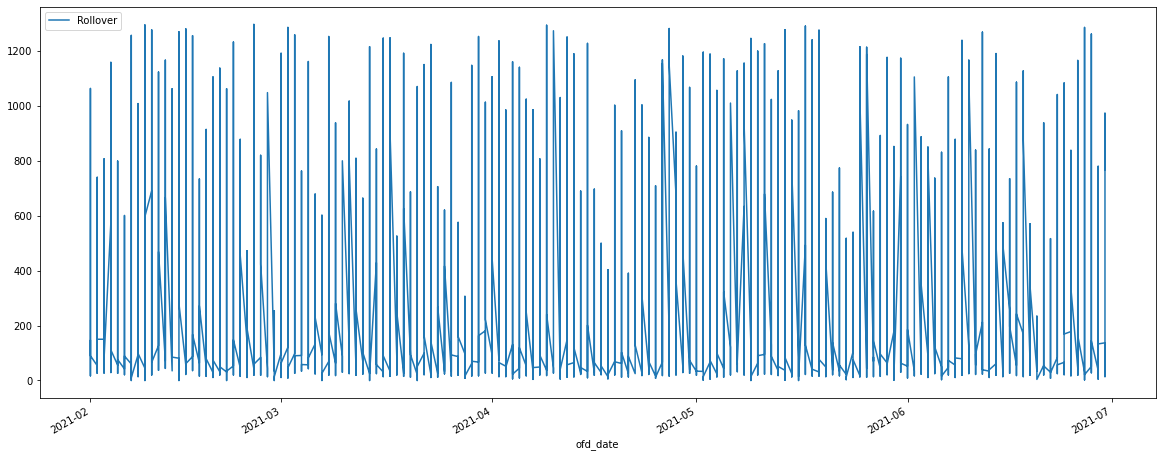

In [26]:
df.plot(x="ofd_date", y=["Rollover"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

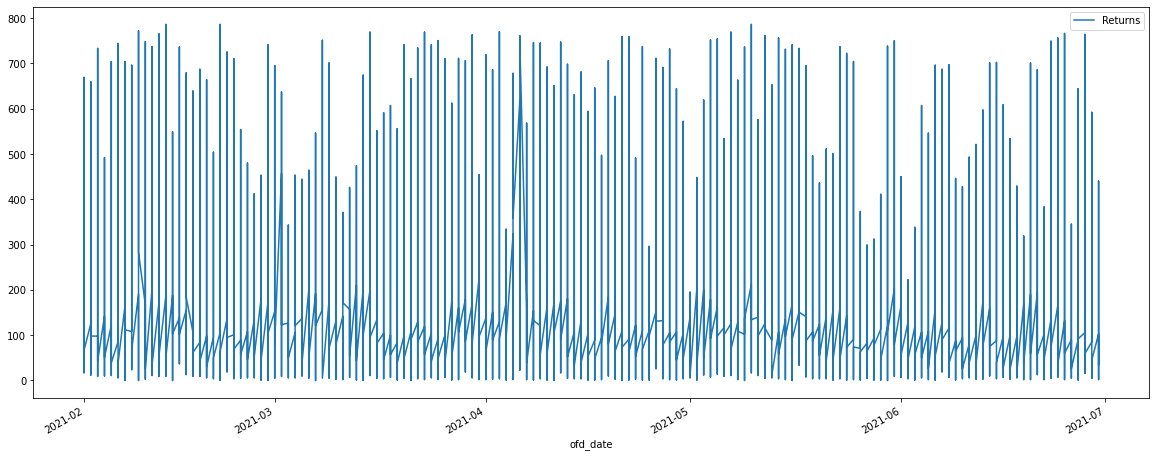

In [27]:
df.plot(x="ofd_date", y=["Returns"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

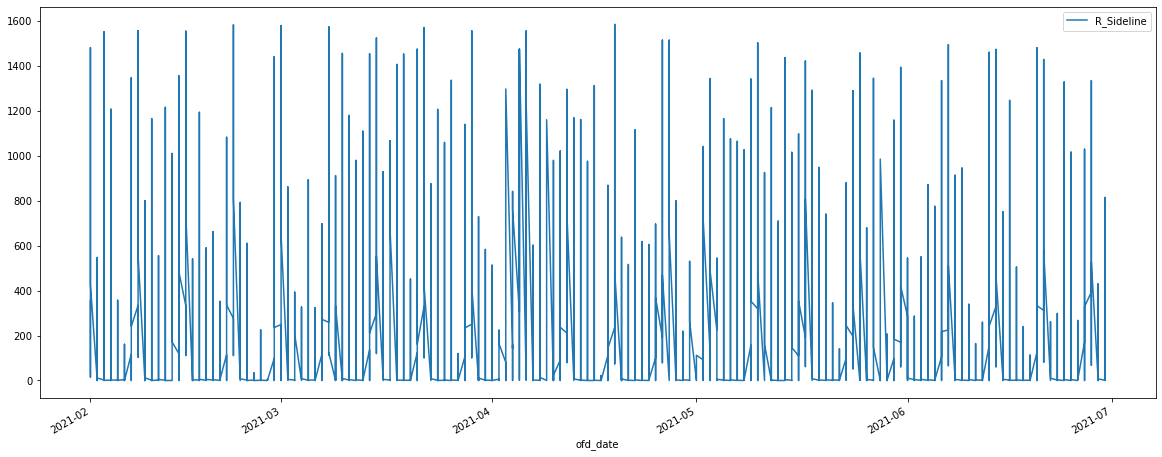

In [28]:
df.plot(x="ofd_date", y=["R_Sideline"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

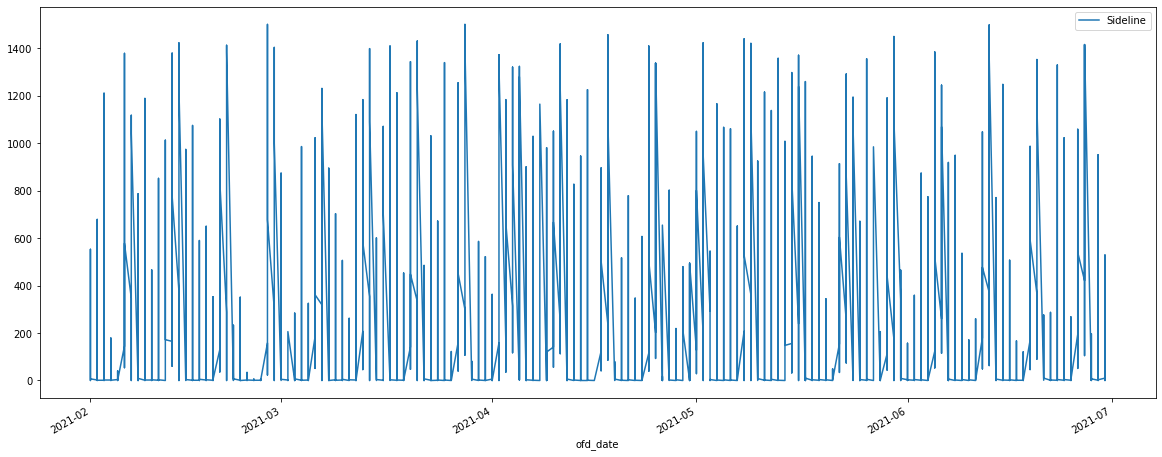

In [29]:
df.plot(x="ofd_date", y=["Sideline"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

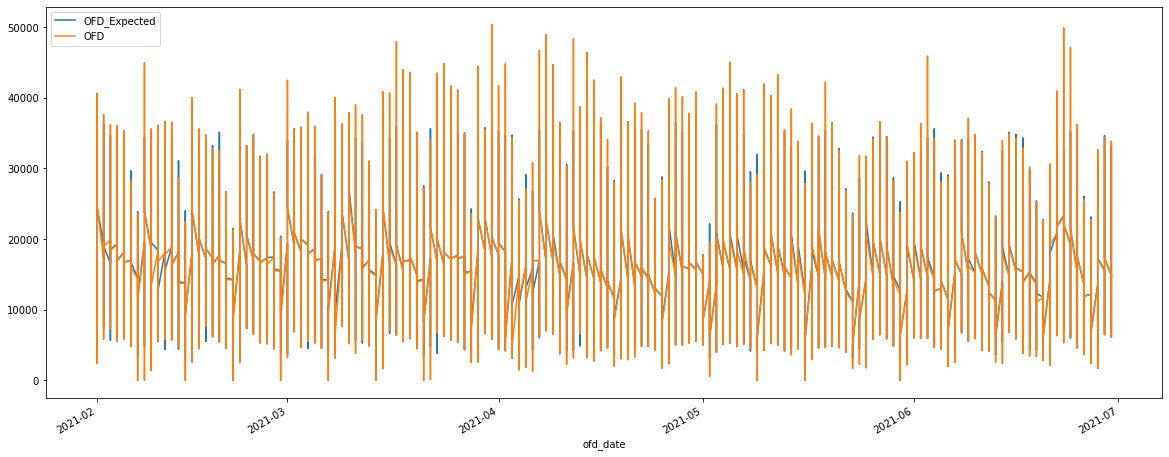

In [30]:
df.plot(x="ofd_date", y=["OFD_Expected","OFD"], figsize=(20,8))

<AxesSubplot:xlabel='ofd_date'>

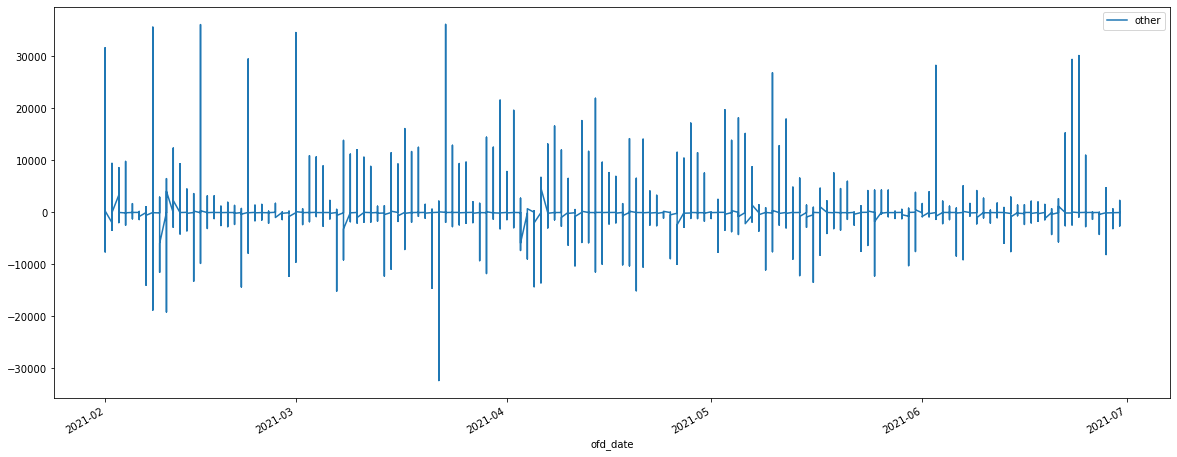

In [31]:
df.plot(x="ofd_date", y="other", figsize=(20,8))

### Both methods have failed